In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('../data/mushrooms.csv')

In [48]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<Axes: xlabel='class', ylabel='count'>

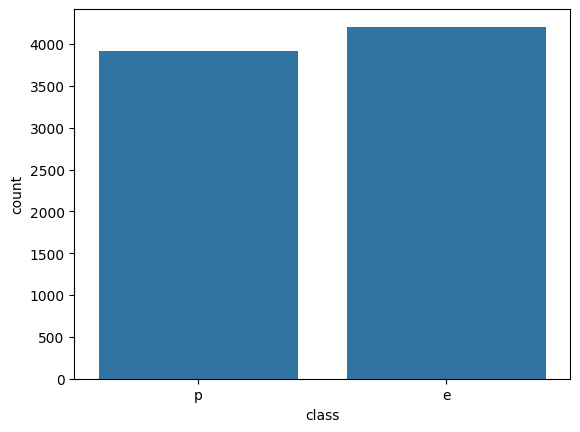

In [49]:
sns.countplot(data=df, x='class')

In [50]:
feat_uni = df.describe().T.reset_index().sort_values(by='unique')

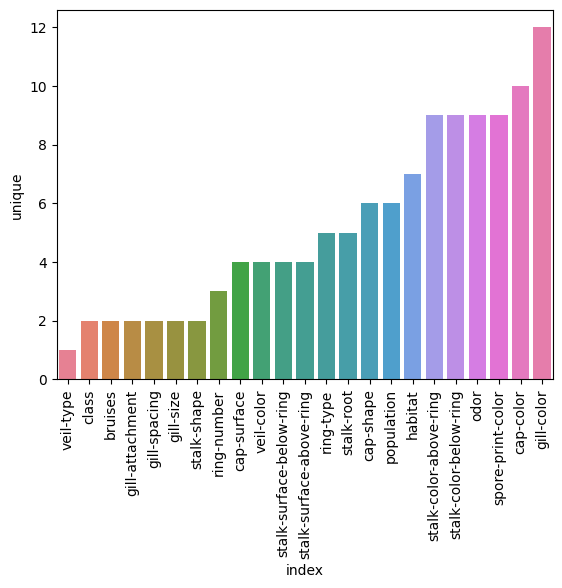

In [51]:
sns.barplot(data=feat_uni, x='index', y='unique', hue='index')
plt.xticks(rotation=90);

In [52]:
X = df.drop('class', axis=1)

In [53]:
X = pd.get_dummies(X, drop_first=True)

In [54]:
y = df['class']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101) 

In [56]:
from sklearn.ensemble import AdaBoostClassifier

In [57]:
model = AdaBoostClassifier(n_estimators=1)

In [58]:
model.fit(X_train, y_train)

,"estimator estimator: object, default=NoneThe base estimator from which the boosted ensemble is built.Support for sample weighting is required, as well as proper``classes_`` and ``n_classes_`` attributes. If ``None``, thenthe base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`initialized with `max_depth=1`... versionadded:: 1.2 `base_estimator` was renamed to `estimator`.",None
,"n_estimators n_estimators: int, default=50The maximum number of estimators at which boosting is terminated.In case of perfect fit, the learning procedure is stopped early.Values must be in the range `[1, inf)`.",1
,"learning_rate learning_rate: float, default=1.0Weight applied to each classifier at each boosting iteration. A higherlearning rate increases the contribution of each classifier. There isa trade-off between the `learning_rate` and `n_estimators` parameters.Values must be in the range `(0.0, inf)`.",1.0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given at each `estimator` at eachboosting iteration.Thus, it is only used when `estimator` exposes a `random_state`.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None


In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [60]:
predictions = model.predict(X_test)

In [61]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       0.96      0.79      0.87      1050
           p       0.81      0.96      0.88       981

    accuracy                           0.88      2031
   macro avg       0.89      0.88      0.88      2031
weighted avg       0.89      0.88      0.87      2031



In [62]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

<Axes: xlabel='odor', ylabel='count'>

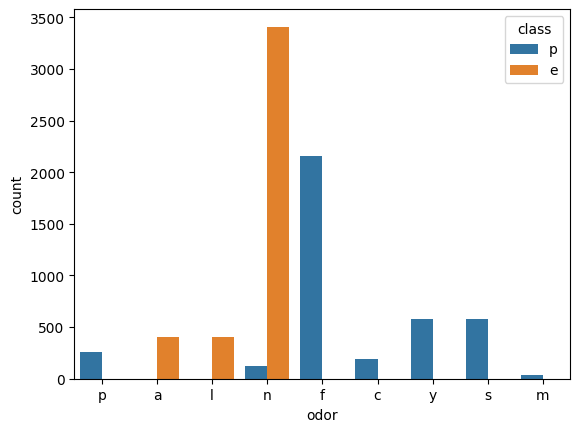

In [63]:
sns.countplot(data=df, x='odor', hue='class')

In [64]:
error_list = []

for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    error_list.append(1 - accuracy_score(y_test, y_pred))

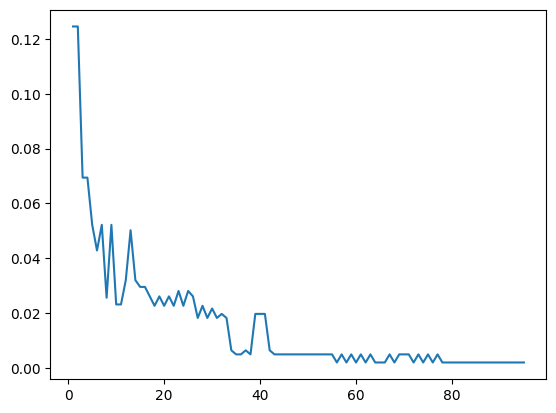

In [65]:
plt.plot(range(1,96), error_list)

In [66]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Importance'])

In [67]:
feats[feats['Importance']>0]

,Importance
odor_c,0.111141
odor_f,0.141658
odor_l,0.039624
odor_n,0.073472
odor_p,0.101549
gill-spacing_w,0.019205
gill-size_n,0.054434
stalk-surface-above-ring_k,0.035818
stalk-color-below-ring_y,0.011959
spore-print-color_k,0.015314


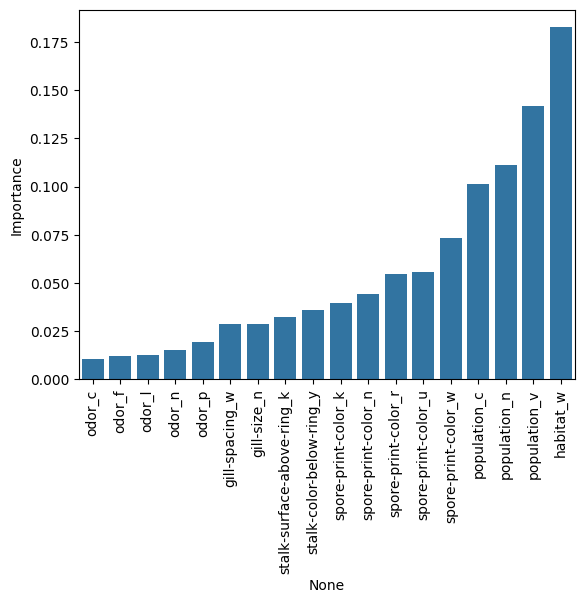

In [68]:
sns.barplot(data=feats[feats['Importance']>0].sort_values('Importance'), x=feats[feats['Importance']>0].index, y='Importance')
plt.xticks(rotation=90);